# Binary Tree
in list you processed first element than next and so on till end of list but thats not the case everytime many time your order is hierarchial rather than sequential so how you will encode this hierarchy in your code? lets say you have company where biggest post is CEO and then all HODS  yiu have only CEO but you will have HODS and all are equal you cannot say process partiicular HOD  first bcz they all have same importance but you can't do that in list as it is ordered set so whats the alternative so solution <mark> Binary Tree </mark> it helps you represent data in hierarchy but it also make insertion and searching very fast (you all have heard about binary search now you will know intutiom behind it)
binary tree is conceptually very similar to linked list but it has two reference left and right

In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
from graphviz import Digraph

In [3]:
class TreeNode:
    def __init__(self,val):
        self.val=val
        self.right=None
        self.left=None
    

In [4]:
def visualize_tree(tree):
    if tree is None:return "Nothing in tree"
    def add_nodes_edges(tree,dot=None):
        if dot is None:
            dot=Digraph()
            dot.attr('node',shape='circle')
            dot.node(name=str(tree),label=str(tree.val))
        for child in [tree.left,tree.right]:
            if child is not None:
                if child==tree.left:dot.attr('node',shape='circle',style='filled',fillcolor='lightblue')
                if child==tree.right:dot.attr('node',shape='doublecircle',style='filled',fillcolor='lightpink')        
                dot.node(name=str(child),label=str(child.val))
                dot.edge(str(tree),str(child))
                dot=add_nodes_edges(child,dot=dot)
        return dot
    dot=add_nodes_edges(tree)
    display(dot)

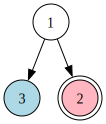

In [5]:
root=TreeNode(1)
root.left=TreeNode(3)
root.right=TreeNode(2)
visualize_tree(root)

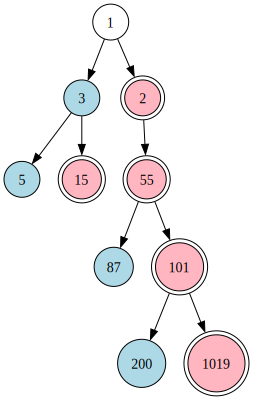

In [6]:
root.left.left=TreeNode(5)
root.left.right=TreeNode(15)

root.right.right=TreeNode(55)
root.right.right.left=TreeNode(87)
root.right.right.right=TreeNode(101)
root.right.right.right.right=TreeNode(1019)
root.right.right.right.left=TreeNode(200)
visualize_tree(root)

## Depth First Search (DFS)
in dfs you exhaausts the depth first once you let say to left tree you will not go to right subtree untill whole left tree is processed depending upon order of root processing dfs has three types pre order in order and post order when you process root first it is pre order if yoy process root at mid it is in order and if you process root at end post ordr


In [12]:
def dfs_pre(tree):  #pre order
#     print(tree.val)
    
#     if tree.left:
#         dfs(tree.left)
#     if tree.right:
#         dfs(tree.right)
    stack=[tree]
    while stack:
        tree=stack.pop(0)
        print(tree.val)
        if tree.right : 
            stack.insert(0,tree.right)
        if tree.left : 
            stack.insert(0,tree.left)
        
    
        

In [13]:
l=[1,2,3]
l.insert(0,45)
print(l)

[45, 1, 2, 3]


In [14]:
def dfs_in(tree):  #in order
    
    if tree.left:
        dfs_in(tree.left)
    
    print(tree.val)
    
    if tree.right:
        dfs_in(tree.right)
    
        

In [15]:
def dfs_post(tree): #post order
    
    if tree.left:
        dfs_post(tree.left)
    if tree.right:
        dfs_post(tree.right)
    
    print(tree.val)        
    
        

In [16]:
dfs_pre(root)

1
3
5
15
2
55
87
101
200
1019


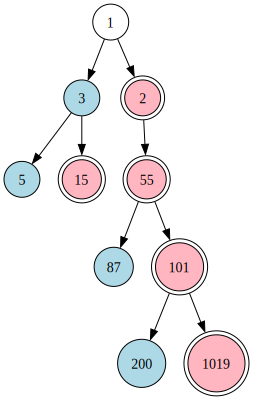

In [14]:
visualize_tree(root)

## Breadth First Search(BFS)
one of main drawback of dfs is if you have infinite tree because in real world choices can be generated at run time  so then if by chance you go to wrong way you will never get to right answer and specially in searching if val is in right subtree and you go to infinite left subtree you will never be able to find val although it exist? whats the solution of it isn't is better if we can traverse one level of tree than other level instead of going into depth we go by explroing breadth 

In [15]:
def bfs(self):
    node=[]
    node.append(self)
    while node:
        current=node.pop(0)
        print(current.val)
        
        if current.left:
            node.append(current.left)
        if current.right:
            node.append(current.right)
        
    
TreeNode.bfs=bfs    

In [16]:
root.bfs()

1
3
2
5
15
55
87
101
200
1019


## Real World Usages  
### Hook
as we have discussed earlier you will never have to implement it again in your life what you have to do is to use them efficiently according to your need you will get highly optimize code for tree what you have to do is to hook it means you dont implement traversal instead you will tell what you want to do with all nodes so you dont have to worry about how you will get all nodes here we are writting both codes but in real world you get traversal readily


In [17]:
def perform_task(self,fn):
     fn(self)
    
     if self.left:
         self.left.perform_task(fn)
        
     if self.right:
         self.right.perform_task(fn)
     

TreeNode.perform_task=perform_task                

In [18]:
class sum_class:
    def __init__(self):
        self.sumi=0
    def add(self,node):
        self.sumi+=node.val
    def reset(self):
        self.sumi=0
    def get(self):
        return self.sumi

In [19]:
s=sum_class()

In [20]:
s.reset()
root.perform_task(s.add)
print(s.get())

1488


# Binary Search Tree
There are many types of trees i.e AVL,RB,BST etc firstly we will code bst as it is most commonly used and very efficient for searching

In [21]:
class BST(TreeNode):
    def __init__(self,val,parent=None):
        super().__init__(val)
        self.parent=parent

## Adding Node in Tree
in BST(Binary Search Tree) the general convention is if value you want to insert is greater than root values you insert into left subtree else insert into right subtree how you go about implementing it what is brute force approach try thinking in term of recursion as it makes code clean and readable in tree there is no such concepts of inserion at mid it only have addnode(push) function becaus your cant tell you to go thousand time left than insert it

In [22]:
def add_node(self,val):
    
  
    if val<self.val:
        if self.left:
            self.left.add_node(val)
            
        else:
            self.left=BST(val,self)
            
    else:
        
        if self.right:
            self.right.add_node(val)
            
        else:
            self.right=BST(val,self)
            
            
BST.add_node=add_node
    

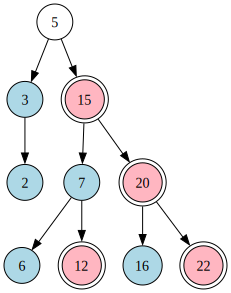

In [23]:
# root=BST(5)
# root.add_node(1)
# root.add_node(20)
# root.add_node(10)
# root.add_node(50)
# root.add_node(30)
# root.add_node(60)
# root.add_node(40)
root=BST(5)
root.add_node(15)
root.add_node(3)
root.add_node(7)
root.add_node(12)
root.add_node(20)
root.add_node(2)
root.add_node(6)
root.add_node(16)
root.add_node(22)
visualize_tree(root)

## Searching in BST   (Binary Search)
one of main reason of using bst is because retreiving data from it is efficient 

In [20]:
def search(self,val):
    if self.val==val:
        return True
    if val<self.val:
        if self.left:
            return self.left.search(val)
        return False
    if self.right:
        return self.right.search(val)
    else:
        return False
BST.search=search    

In [21]:
root.search(40)

True

## Deletion in BST
In BST deletion can be from any of following cases : <br>
case 1 : deleting leaf node (node with no child)<br>
case 2 : deleting node with one child<br>
case 3 : deleting node with two child

In [22]:
def delete(self,val):
    
    if self.val==val:
        
        if self.left is None and self.right is None:     #case 1 : deleting leave node
            if self.parent:
                self.set_parent(None)                     #just remove parent reference either left or right which point it
                
            else :return None
            
        elif self.right is  None or self.left is None:  # case 2 : one child node
            
            if self.right:
                self.set_parent(self.right)            # connect its parent with its child so it will be removed
            
            else:
                self.set_parent(self.left)
        
        elif self.left and self.right:                # deleting node with two child
            
            successor=self.right.find_min()# finding successor whowillreplace this it can be min from right or max from left
            self.val=successor
            self.right.delete(successor)     #deleting successor from tree
        
    elif val>self.val and self.right :
        self.right.delete(val)
    
    elif val<self.val and self.left:
        self.left.delete(val)
    
    else:
        print("value not in tree")      #not a good practice raise a exception here
        return    
    return self.find_root()
    
    
BST.delete=delete    

In [23]:
def set_parent(self,node):
    if self.parent.right==self:
        self.parent.right=node
    else:
        self.parent.left=node
    self.parent=None
BST.set_parent=set_parent    

In [24]:
def find_min(self):
    if self.left:
        return self.left.find_min()
    return self.val
BST.find_min=find_min

In [25]:
def find_root(self):
    if self.parent is None:
        return self
    self.parent.find_root
BST.find_root=find_root    

In [26]:
root=root.delete(10)

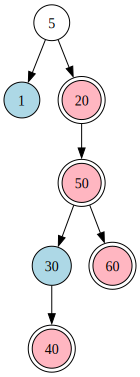

In [27]:
visualize_tree(root)

In [28]:
root=root.delete(5)

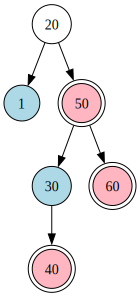

In [29]:
visualize_tree(root)

In [30]:
root=root.delete(30)

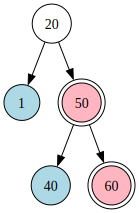

In [31]:
visualize_tree(root)

# Exam Questions :<br>
<b>1.write recursive function to count number of nodes in tree.<br>2.write function to calculate levels of tree or height of tree.<br>3.write nodes in pre,in and post order.<br>4.write function to ensure all nodes in bst satisfies its condition</b>

In [32]:
def count_nodes(self):
    right=0
    left=0
    if self.left:
        left=self.left.count_nodes()
    if self.right:
        right=self.right.count_nodes()
    return 1+right+left

            
BST.count_nodes=count_nodes
    

In [33]:
root.count_nodes()

5

In [34]:
def count_levels(self):
    right=0
    left=0
    if self.left:
        left=self.left.count_levels()
    if self.right:
        right=self.right.count_levels()
    return 1+max(right,left)

            
BST.count_levels=count_levels
    

In [35]:
root.count_levels()

3

In [36]:
def is_bst(self):
    node=[]
    node.append(self)
    while node:
        current=node.pop(0)
        
        
        if current.left:
            if current.left.val>=current.val:
                return False
            node.append(current.left)
        if current.right:
            if current.right.val<=current.val:
                return False
            node.append(current.right)
    return True
   


BST.is_bst=is_bst
        

In [37]:
root.is_bst()

True

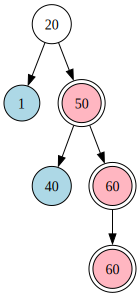

In [38]:
root.add_node(60)
visualize_tree(root)

In [39]:
root.is_bst()

False